In [101]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df = pd.read_csv("AirQualityUCI.csv")

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [103]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
null_data = df[df.isnull().any(axis=1)]

In [104]:
df = df.dropna()

In [105]:
import numpy as np
df = df.replace(-200, np.nan)

In [106]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [107]:
h = df['Time'].tolist()
l=[]
for i in range(len(h)):
    l.append(h[i].split(":")[0])
df['hour']=l

In [108]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [109]:
cols=["year","month","day","hour"]
df['date'] = df[cols].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,year,month,day,date
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,2004,3,10,2004/3/10/18
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,2004,3,10,2004/3/10/19
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,2004,3,10,2004/3/10/20
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,2004,3,10,2004/3/10/21
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,2004,3,10,2004/3/10/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,2005,4,4,2005/4/4/10
9353,2005-04-04,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,2005,4,4,2005/4/4/11
9354,2005-04-04,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,2005,4,4,2005/4/4/12
9355,2005-04-04,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13,2005,4,4,2005/4/4/13


In [110]:
df['date']=pd.to_datetime(df['date'])

In [111]:
del df['NMHC(GT)']

In [112]:
del df['PT08.S2(NMHC)']

In [113]:
# Create New DataFrame of Specific column by DataFrame.assign() method.
df_1 = pd.DataFrame().assign(date=df['date'],COGT=df['CO(GT)'])
print(df_1)

                    date  COGT
0    2004-03-10 18:00:00   2.6
1    2004-03-10 19:00:00   2.0
2    2004-03-10 20:00:00   2.2
3    2004-03-10 21:00:00   2.2
4    2004-03-10 22:00:00   1.6
...                  ...   ...
9352 2005-04-04 10:00:00   3.1
9353 2005-04-04 11:00:00   2.4
9354 2005-04-04 12:00:00   2.4
9355 2005-04-04 13:00:00   2.1
9356 2005-04-04 14:00:00   2.2

[9357 rows x 2 columns]


In [114]:
df_1.isnull().sum()

date       0
COGT    1683
dtype: int64

In [115]:
df_1['COGT'] = df_1['COGT'].ewm(halflife=4).mean()

In [116]:
df_1.isnull().sum()

date    0
COGT    0
dtype: int64

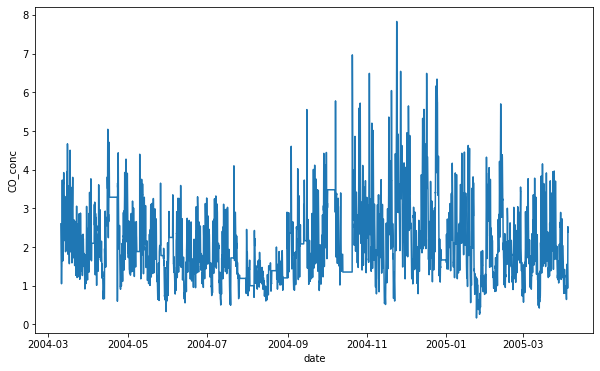

In [117]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# plotting forecast sales
plt.plot(df_1['date'], df_1['COGT'])
plt.xlabel('date')
plt.ylabel('CO_conc')
plt.show()

In [118]:
df_1.rename(columns={'date':'ds','COGT':'y'},inplace=True)
df_1

,ds,y
0,2004-03-10 18:00:00,2.600000
1,2004-03-10 19:00:00,2.274072
2,2004-03-10 20:00:00,2.245001
3,2004-03-10 21:00:00,2.230682
4,2004-03-10 22:00:00,2.057541
...,...,...
9352,2005-04-04 10:00:00,2.525947
9353,2005-04-04 11:00:00,2.504913
9354,2005-04-04 12:00:00,2.487530
9355,2005-04-04 13:00:00,2.423739


In [119]:
train_data = df_1[:len(df)-720]
print(train_data)
test_data = df_1[len(df)-720:]
print(test_data.shape)
test_data

                      ds         y
0    2004-03-10 18:00:00  2.600000
1    2004-03-10 19:00:00  2.274072
2    2004-03-10 20:00:00  2.245001
3    2004-03-10 21:00:00  2.230682
4    2004-03-10 22:00:00  2.057541
...                  ...       ...
8632 2005-03-05 10:00:00  1.676540
8633 2005-03-05 11:00:00  1.580256
8634 2005-03-05 12:00:00  1.566958
8635 2005-03-05 13:00:00  1.572397
8636 2005-03-05 14:00:00  1.675140

[8637 rows x 2 columns]
(720, 2)


,ds,y
8637,2005-03-05 15:00:00,1.646600
8638,2005-03-05 16:00:00,1.671502
8639,2005-03-05 17:00:00,1.724656
8640,2005-03-05 18:00:00,1.752952
8641,2005-03-05 19:00:00,1.873232
...,...,...
9352,2005-04-04 10:00:00,2.525947
9353,2005-04-04 11:00:00,2.504913
9354,2005-04-04 12:00:00,2.487530
9355,2005-04-04 13:00:00,2.423739


In [120]:
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(train_data)

12:47:50 - cmdstanpy - INFO - Chain [1] start processing
12:47:52 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
future = model.make_future_dataframe(periods=720, freq='H')

In [122]:
future.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [123]:
future

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00
...,...
9352,2005-04-04 10:00:00
9353,2005-04-04 11:00:00
9354,2005-04-04 12:00:00
9355,2005-04-04 13:00:00


In [124]:
forecast = model.predict(future)

In [125]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9347,2005-04-04 05:00:00,1.411025,-1.095760,1.937328,0.994394,1.774229,-0.943653,-0.943653,-0.943653,-0.497794,-0.497794,-0.497794,-0.445859,-0.445859,-0.445859,0.0,0.0,0.0,0.467373
9348,2005-04-04 06:00:00,1.410574,-1.043168,1.837697,0.992911,1.774561,-0.968194,-0.968194,-0.968194,-0.541217,-0.541217,-0.541217,-0.426978,-0.426978,-0.426978,0.0,0.0,0.0,0.442380
9349,2005-04-04 07:00:00,1.410123,-0.983476,1.981750,0.991427,1.774894,-0.882539,-0.882539,-0.882539,-0.475118,-0.475118,-0.475118,-0.407420,-0.407420,-0.407420,0.0,0.0,0.0,0.527584
9350,2005-04-04 08:00:00,1.409671,-0.805896,2.144252,0.989944,1.775226,-0.723455,-0.723455,-0.723455,-0.336160,-0.336160,-0.336160,-0.387295,-0.387295,-0.387295,0.0,0.0,0.0,0.686217
9351,2005-04-04 09:00:00,1.409220,-0.579233,2.345156,0.988460,1.775558,-0.555132,-0.555132,-0.555132,-0.188424,-0.188424,-0.188424,-0.366709,-0.366709,-0.366709,0.0,0.0,0.0,0.854088
9352,2005-04-04 10:00:00,1.408769,-0.605480,2.436557,0.986977,1.775890,-0.427900,-0.427900,-0.427900,-0.082134,-0.082134,-0.082134,-0.345767,-0.345767,-0.345767,0.0,0.0,0.0,0.980868
9353,2005-04-04 11:00:00,1.408317,-0.500304,2.545232,0.985493,1.776222,-0.355916,-0.355916,-0.355916,-0.031346,-0.031346,-0.031346,-0.324570,-0.324570,-0.324570,0.0,0.0,0.0,1.052401
9354,2005-04-04 12:00:00,1.407866,-0.440707,2.476588,0.984010,1.776554,-0.324982,-0.324982,-0.324982,-0.021763,-0.021763,-0.021763,-0.303219,-0.303219,-0.303219,0.0,0.0,0.0,1.082884
9355,2005-04-04 13:00:00,1.407415,-0.500059,2.577654,0.982526,1.776887,-0.313475,-0.313475,-0.313475,-0.031670,-0.031670,-0.031670,-0.281805,-0.281805,-0.281805,0.0,0.0,0.0,1.093940
9356,2005-04-04 14:00:00,1.406963,-0.485226,2.642564,0.981043,1.777219,-0.303019,-0.303019,-0.303019,-0.042599,-0.042599,-0.042599,-0.260420,-0.260420,-0.260420,0.0,0.0,0.0,1.103944


In [126]:
df_new = forecast[['ds', 'yhat']]

In [127]:
df_new

,ds,yhat
0,2004-03-10 18:00:00,2.812593
1,2004-03-10 19:00:00,2.970068
2,2004-03-10 20:00:00,3.061660
3,2004-03-10 21:00:00,3.049595
4,2004-03-10 22:00:00,2.948657
...,...,...
9352,2005-04-04 10:00:00,0.980868
9353,2005-04-04 11:00:00,1.052401
9354,2005-04-04 12:00:00,1.082884
9355,2005-04-04 13:00:00,1.093940


In [128]:
df_new = df_new[len(df_new)-720:]

In [129]:
df_new

,ds,yhat
8637,2005-03-05 15:00:00,1.626102
8638,2005-03-05 16:00:00,1.645087
8639,2005-03-05 17:00:00,1.724481
8640,2005-03-05 18:00:00,1.852142
8641,2005-03-05 19:00:00,1.978489
...,...,...
9352,2005-04-04 10:00:00,0.980868
9353,2005-04-04 11:00:00,1.052401
9354,2005-04-04 12:00:00,1.082884
9355,2005-04-04 13:00:00,1.093940


In [130]:
test_data

,ds,y
8637,2005-03-05 15:00:00,1.646600
8638,2005-03-05 16:00:00,1.671502
8639,2005-03-05 17:00:00,1.724656
8640,2005-03-05 18:00:00,1.752952
8641,2005-03-05 19:00:00,1.873232
...,...,...
9352,2005-04-04 10:00:00,2.525947
9353,2005-04-04 11:00:00,2.504913
9354,2005-04-04 12:00:00,2.487530
9355,2005-04-04 13:00:00,2.423739


In [131]:
import numpy as np
Y = test_data['y']
Yhat = df_new['yhat']
y_true, Y_pred = np.array(Y), np.array(Yhat)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

31.814769229381778


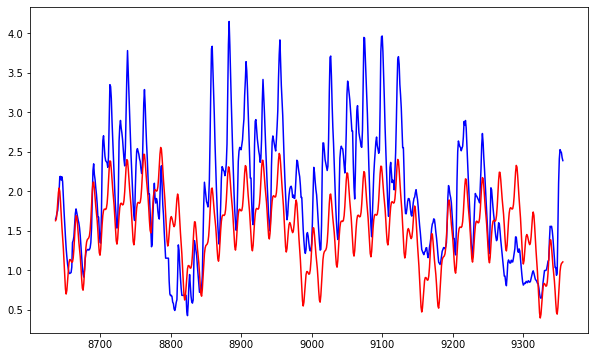

In [132]:
orig = plt.plot(test_data['y'], color='blue', label='Original')
predicted = plt.plot(df_new['yhat'], color='red', label='Predicted')
plt.show()

In [133]:
df_1 = pd.DataFrame().assign(date=df['date'],C6H6GT=df['C6H6(GT)'])
print(df_1)

                    date  C6H6GT
0    2004-03-10 18:00:00    11.9
1    2004-03-10 19:00:00     9.4
2    2004-03-10 20:00:00     9.0
3    2004-03-10 21:00:00     9.2
4    2004-03-10 22:00:00     6.5
...                  ...     ...
9352 2005-04-04 10:00:00    13.5
9353 2005-04-04 11:00:00    11.4
9354 2005-04-04 12:00:00    12.4
9355 2005-04-04 13:00:00     9.5
9356 2005-04-04 14:00:00    11.9

[9357 rows x 2 columns]


In [134]:
df_1.isnull().sum()

date        0
C6H6GT    366
dtype: int64

In [135]:
df_1['C6H6GT'] = df_1['C6H6GT'].ewm(halflife=4).mean()
df_1.isnull().sum()

date      0
C6H6GT    0
dtype: int64

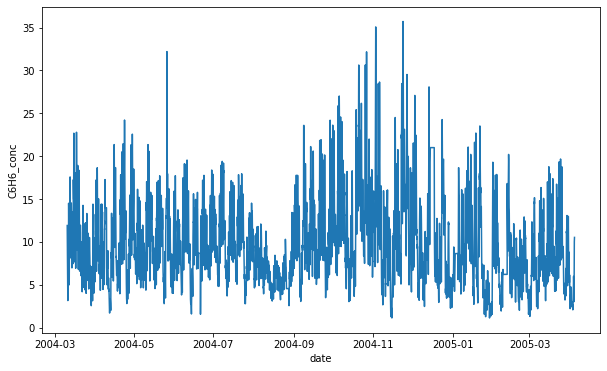

In [136]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# plotting forecast sales
plt.plot(df_1['date'], df_1['C6H6GT'])
plt.xlabel('date')
plt.ylabel('C6H6_conc')
plt.show()

In [137]:
df_1.rename(columns={'date':'ds','C6H6GT':'y'},inplace=True)
df_1

,ds,y
0,2004-03-10 18:00:00,11.900000
1,2004-03-10 19:00:00,10.541966
2,2004-03-10 20:00:00,9.936800
3,2004-03-10 21:00:00,9.702345
4,2004-03-10 22:00:00,8.823209
...,...,...
9352,2005-04-04 10:00:00,9.752433
9353,2005-04-04 11:00:00,10.014567
9354,2005-04-04 12:00:00,10.394098
9355,2005-04-04 13:00:00,10.251844


In [138]:
train_data = df_1[:len(df)-720]
print(train_data)
test_data = df_1[len(df)-720:]
print(test_data.shape)
test_data

                      ds          y
0    2004-03-10 18:00:00  11.900000
1    2004-03-10 19:00:00  10.541966
2    2004-03-10 20:00:00   9.936800
3    2004-03-10 21:00:00   9.702345
4    2004-03-10 22:00:00   8.823209
...                  ...        ...
8632 2005-03-05 10:00:00   5.821644
8633 2005-03-05 11:00:00   5.722738
8634 2005-03-05 12:00:00   5.655479
8635 2005-03-05 13:00:00   5.821666
8636 2005-03-05 14:00:00   6.215978

[8637 rows x 2 columns]
(720, 2)


,ds,y
8637,2005-03-05 15:00:00,6.165705
8638,2005-03-05 16:00:00,6.346175
8639,2005-03-05 17:00:00,6.672946
8640,2005-03-05 18:00:00,6.836354
8641,2005-03-05 19:00:00,7.196508
...,...,...
9352,2005-04-04 10:00:00,9.752433
9353,2005-04-04 11:00:00,10.014567
9354,2005-04-04 12:00:00,10.394098
9355,2005-04-04 13:00:00,10.251844


In [139]:
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(train_data)

12:48:10 - cmdstanpy - INFO - Chain [1] start processing
12:48:13 - cmdstanpy - INFO - Chain [1] done processing


In [140]:
future = model.make_future_dataframe(periods=720, freq='H')
forecast = model.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9347,2005-04-04 05:00:00,4.163912,-9.986250,5.299641,2.552768,5.722935,-6.196978,-6.196978,-6.196978,-3.422647,-3.422647,-3.422647,-2.774331,-2.774331,-2.774331,0.0,0.0,0.0,-2.033066
9348,2005-04-04 06:00:00,4.161316,-9.308365,5.475640,2.545428,5.723450,-6.026608,-6.026608,-6.026608,-3.404003,-3.404003,-3.404003,-2.622605,-2.622605,-2.622605,0.0,0.0,0.0,-1.865292
9349,2005-04-04 07:00:00,4.158720,-8.259317,6.229651,2.537777,5.723964,-5.149942,-5.149942,-5.149942,-2.684760,-2.684760,-2.684760,-2.465183,-2.465183,-2.465183,0.0,0.0,0.0,-0.991222
9350,2005-04-04 08:00:00,4.156124,-7.448002,7.928386,2.527886,5.724479,-3.926826,-3.926826,-3.926826,-1.623950,-1.623950,-1.623950,-2.302876,-2.302876,-2.302876,0.0,0.0,0.0,0.229297
9351,2005-04-04 09:00:00,4.153527,-5.816315,8.879017,2.517995,5.724993,-2.807949,-2.807949,-2.807949,-0.671441,-0.671441,-0.671441,-2.136508,-2.136508,-2.136508,0.0,0.0,0.0,1.345579
9352,2005-04-04 10:00:00,4.150931,-5.056222,9.659000,2.508104,5.725507,-2.051352,-2.051352,-2.051352,-0.084448,-0.084448,-0.084448,-1.966904,-1.966904,-1.966904,0.0,0.0,0.0,2.099580
9353,2005-04-04 11:00:00,4.148335,-4.710725,10.123636,2.498212,5.726022,-1.638018,-1.638018,-1.638018,0.156870,0.156870,0.156870,-1.794887,-1.794887,-1.794887,0.0,0.0,0.0,2.510318
9354,2005-04-04 12:00:00,4.145739,-4.596510,9.909344,2.488321,5.726536,-1.405791,-1.405791,-1.405791,0.215484,0.215484,0.215484,-1.621275,-1.621275,-1.621275,0.0,0.0,0.0,2.739948
9355,2005-04-04 13:00:00,4.143143,-4.285899,10.136671,2.478430,5.727051,-1.226580,-1.226580,-1.226580,0.220291,0.220291,0.220291,-1.446872,-1.446872,-1.446872,0.0,0.0,0.0,2.916563
9356,2005-04-04 14:00:00,4.140547,-4.773923,10.628912,2.468539,5.727565,-1.052370,-1.052370,-1.052370,0.220092,0.220092,0.220092,-1.272462,-1.272462,-1.272462,0.0,0.0,0.0,3.088177


In [141]:
df_new = forecast[['ds', 'yhat']]
df_new = df_new[len(df_new)-720:]
Y = test_data['y']
Yhat = df_new['yhat']
y_true, Y_pred = np.array(Y), np.array(Yhat)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

48.92535810590715


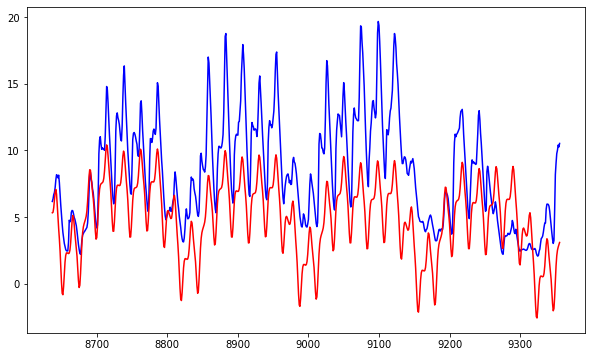

In [142]:
orig = plt.plot(test_data['y'], color='blue', label='Original')
predicted = plt.plot(df_new['yhat'], color='red', label='Predicted')
plt.show()

In [143]:
df_1 = pd.DataFrame().assign(date=df['date'],NOxGT=df['NOx(GT)'])
print(df_1)

                    date  NOxGT
0    2004-03-10 18:00:00  166.0
1    2004-03-10 19:00:00  103.0
2    2004-03-10 20:00:00  131.0
3    2004-03-10 21:00:00  172.0
4    2004-03-10 22:00:00  131.0
...                  ...    ...
9352 2005-04-04 10:00:00  472.0
9353 2005-04-04 11:00:00  353.0
9354 2005-04-04 12:00:00  293.0
9355 2005-04-04 13:00:00  235.0
9356 2005-04-04 14:00:00  265.0

[9357 rows x 2 columns]


In [144]:
df_1.isnull().sum()

date        0
NOxGT    1639
dtype: int64

In [145]:
df_1['NOxGT'] = df_1['NOxGT'].ewm(halflife=4).mean()
df_1.isnull().sum()

date     0
NOxGT    0
dtype: int64

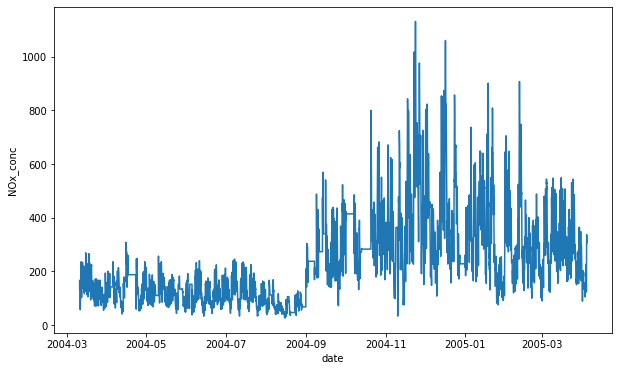

In [146]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# plotting forecast sales
plt.plot(df_1['date'], df_1['NOxGT'])
plt.xlabel('date')
plt.ylabel('NOx_conc')
plt.show()

In [147]:
df_1.rename(columns={'date':'ds','NOxGT':'y'},inplace=True)
df_1

,ds,y
0,2004-03-10 18:00:00,166.000000
1,2004-03-10 19:00:00,131.777542
2,2004-03-10 20:00:00,131.472385
3,2004-03-10 21:00:00,144.368562
4,2004-03-10 22:00:00,140.698509
...,...,...
9352,2005-04-04 10:00:00,333.389510
9353,2005-04-04 11:00:00,336.509609
9354,2005-04-04 12:00:00,329.587074
9355,2005-04-04 13:00:00,314.537932


In [148]:
train_data = df_1[:len(df)-720]
print(train_data)
test_data = df_1[len(df)-720:]
print(test_data.shape)
test_data

                      ds           y
0    2004-03-10 18:00:00  166.000000
1    2004-03-10 19:00:00  131.777542
2    2004-03-10 20:00:00  131.472385
3    2004-03-10 21:00:00  144.368562
4    2004-03-10 22:00:00  140.698509
...                  ...         ...
8632 2005-03-05 10:00:00  266.002496
8633 2005-03-05 11:00:00  248.758546
8634 2005-03-05 12:00:00  238.751625
8635 2005-03-05 13:00:00  232.240975
8636 2005-03-05 14:00:00  238.722506

[8637 rows x 2 columns]
(720, 2)


,ds,y
8637,2005-03-05 15:00:00,229.186890
8638,2005-03-05 16:00:00,233.364828
8639,2005-03-05 17:00:00,236.211313
8640,2005-03-05 18:00:00,239.720123
8641,2005-03-05 19:00:00,256.480738
...,...,...
9352,2005-04-04 10:00:00,333.389510
9353,2005-04-04 11:00:00,336.509609
9354,2005-04-04 12:00:00,329.587074
9355,2005-04-04 13:00:00,314.537932


In [149]:
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(train_data)

13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing


In [150]:
future = model.make_future_dataframe(periods=720, freq='H')
forecast = model.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9347,2005-04-04 05:00:00,217.770796,-92.237487,342.075250,155.862241,292.406151,-110.976825,-110.976825,-110.976825,-58.691326,-58.691326,-58.691326,-52.285500,-52.285500,-52.285500,0.0,0.0,0.0,106.793971
9348,2005-04-04 06:00:00,217.697442,-94.462926,297.834291,155.586154,292.365307,-113.979018,-113.979018,-113.979018,-64.473752,-64.473752,-64.473752,-49.505266,-49.505266,-49.505266,0.0,0.0,0.0,103.718425
9349,2005-04-04 07:00:00,217.624089,-91.137472,341.250488,155.384102,292.324463,-102.532600,-102.532600,-102.532600,-55.918049,-55.918049,-55.918049,-46.614550,-46.614550,-46.614550,0.0,0.0,0.0,115.091489
9350,2005-04-04 08:00:00,217.550735,-70.767550,357.422340,155.197823,292.283619,-79.565108,-79.565108,-79.565108,-35.933055,-35.933055,-35.933055,-43.632053,-43.632053,-43.632053,0.0,0.0,0.0,137.985626
9351,2005-04-04 09:00:00,217.477381,-44.109096,371.184749,155.011544,292.241907,-53.569654,-53.569654,-53.569654,-12.992978,-12.992978,-12.992978,-40.576676,-40.576676,-40.576676,0.0,0.0,0.0,163.907727
9352,2005-04-04 10:00:00,217.404027,-32.237509,393.003002,154.825265,292.199916,-33.013369,-33.013369,-33.013369,4.453991,4.453991,4.453991,-37.467360,-37.467360,-37.467360,0.0,0.0,0.0,184.390657
9353,2005-04-04 11:00:00,217.330673,-8.546138,409.468959,154.638987,292.157925,-21.571841,-21.571841,-21.571841,12.751087,12.751087,12.751087,-34.322928,-34.322928,-34.322928,0.0,0.0,0.0,195.758832
9354,2005-04-04 12:00:00,217.257319,-2.416305,403.118766,154.452708,292.115934,-17.522715,-17.522715,-17.522715,13.639209,13.639209,13.639209,-31.161924,-31.161924,-31.161924,0.0,0.0,0.0,199.734604
9355,2005-04-04 13:00:00,217.183965,-1.701500,400.866189,154.266429,292.073943,-16.706664,-16.706664,-16.706664,11.295799,11.295799,11.295799,-28.002464,-28.002464,-28.002464,0.0,0.0,0.0,200.477301
9356,2005-04-04 14:00:00,217.110611,3.334504,419.593585,154.080150,292.092985,-15.726397,-15.726397,-15.726397,9.135692,9.135692,9.135692,-24.862090,-24.862090,-24.862090,0.0,0.0,0.0,201.384214


In [151]:
df_new = forecast[['ds', 'yhat']]
df_new = df_new[len(df_new)-720:]
Y = test_data['y']
Yhat = df_new['yhat']
y_true, Y_pred = np.array(Y), np.array(Yhat)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

24.693178523620553


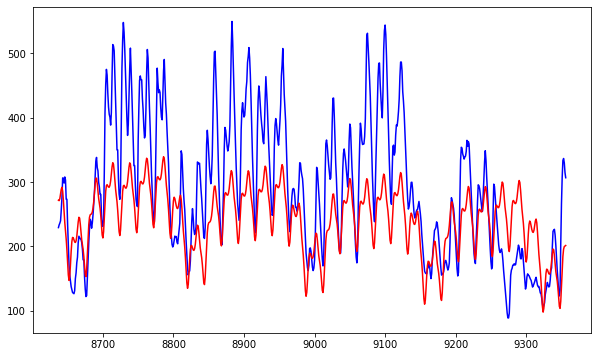

In [152]:
orig = plt.plot(test_data['y'], color='blue', label='Original')
predicted = plt.plot(df_new['yhat'], color='red', label='Predicted')
plt.show()

In [161]:
df_1 = pd.DataFrame().assign(date=df['date'],NO2GT=df['NO2(GT)'])
print(df_1)

                    date  NO2GT
0    2004-03-10 18:00:00  113.0
1    2004-03-10 19:00:00   92.0
2    2004-03-10 20:00:00  114.0
3    2004-03-10 21:00:00  122.0
4    2004-03-10 22:00:00  116.0
...                  ...    ...
9352 2005-04-04 10:00:00  190.0
9353 2005-04-04 11:00:00  179.0
9354 2005-04-04 12:00:00  175.0
9355 2005-04-04 13:00:00  156.0
9356 2005-04-04 14:00:00  168.0

[9357 rows x 2 columns]


In [162]:
df_1.isnull().sum()

date        0
NO2GT    1642
dtype: int64

In [163]:
df_1['NO2GT'] = df_1['NO2GT'].ewm(halflife=4).mean()
df_1.isnull().sum()

date     0
NO2GT    0
dtype: int64

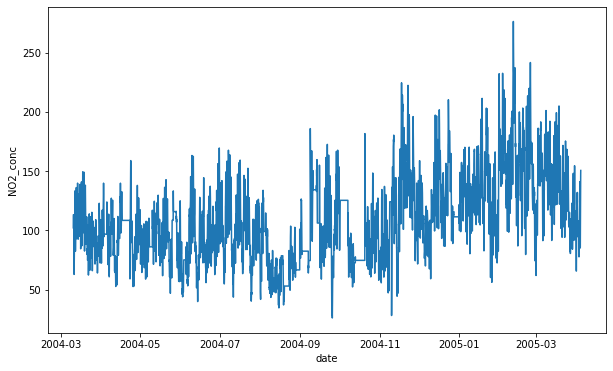

In [164]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# plotting forecast sales
plt.plot(df_1['date'], df_1['NO2GT'])
plt.xlabel('date')
plt.ylabel('NO2_conc')
plt.show()

In [165]:
df_1.rename(columns={'date':'ds','NO2GT':'y'},inplace=True)
df_1

,ds,y
0,2004-03-10 18:00:00,113.000000
1,2004-03-10 19:00:00,101.592514
2,2004-03-10 20:00:00,106.462008
3,2004-03-10 21:00:00,111.406308
4,2004-03-10 22:00:00,112.667408
...,...,...
9352,2005-04-04 10:00:00,132.667246
9353,2005-04-04 11:00:00,140.038953
9354,2005-04-04 12:00:00,145.601381
9355,2005-04-04 13:00:00,147.255838


In [166]:
train_data = df_1[:len(df)-720]
print(train_data)
test_data = df_1[len(df)-720:]
print(test_data.shape)
test_data

                      ds           y
0    2004-03-10 18:00:00  113.000000
1    2004-03-10 19:00:00  101.592514
2    2004-03-10 20:00:00  106.462008
3    2004-03-10 21:00:00  111.406308
4    2004-03-10 22:00:00  112.667408
...                  ...         ...
8632 2005-03-05 10:00:00  149.427925
8633 2005-03-05 11:00:00  144.051270
8634 2005-03-05 12:00:00  142.231128
8635 2005-03-05 13:00:00  141.210574
8636 2005-03-05 14:00:00  144.599674

[8637 rows x 2 columns]
(720, 2)


,ds,y
8637,2005-03-05 15:00:00,142.553684
8638,2005-03-05 16:00:00,145.701135
8639,2005-03-05 17:00:00,147.847698
8640,2005-03-05 18:00:00,149.160530
8641,2005-03-05 19:00:00,153.635091
...,...,...
9352,2005-04-04 10:00:00,132.667246
9353,2005-04-04 11:00:00,140.038953
9354,2005-04-04 12:00:00,145.601381
9355,2005-04-04 13:00:00,147.255838


In [167]:
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.95)

# train model
model.fit(train_data)

13:23:11 - cmdstanpy - INFO - Chain [1] start processing
13:23:19 - cmdstanpy - INFO - Chain [1] done processing


In [168]:
future = model.make_future_dataframe(periods=720, freq='H')
forecast = model.predict(future)
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9347,2005-04-04 05:00:00,172.430657,86.860642,197.143716,127.731745,210.551752,-29.776825,-29.776825,-29.776825,-16.449841,-16.449841,-16.449841,-13.326983,-13.326983,-13.326983,0.0,0.0,0.0,142.653832
9348,2005-04-04 06:00:00,172.448811,82.404231,198.460893,127.627351,210.646846,-32.150009,-32.150009,-32.150009,-19.579778,-19.579778,-19.579778,-12.570231,-12.570231,-12.570231,0.0,0.0,0.0,140.298802
9349,2005-04-04 07:00:00,172.466965,84.280840,199.878216,127.522956,210.741502,-30.720004,-30.720004,-30.720004,-18.927875,-18.927875,-18.927875,-11.792129,-11.792129,-11.792129,0.0,0.0,0.0,141.746961
9350,2005-04-04 08:00:00,172.485119,87.872585,202.625328,127.418561,210.836159,-25.857136,-25.857136,-25.857136,-14.858918,-14.858918,-14.858918,-10.998218,-10.998218,-10.998218,0.0,0.0,0.0,146.627983
9351,2005-04-04 09:00:00,172.503274,84.606676,213.134867,127.351589,210.930815,-19.422380,-19.422380,-19.422380,-9.228394,-9.228394,-9.228394,-10.193986,-10.193986,-10.193986,0.0,0.0,0.0,153.080894
9352,2005-04-04 10:00:00,172.521428,99.195185,217.574850,127.294226,211.025471,-13.552524,-13.552524,-13.552524,-4.167702,-4.167702,-4.167702,-9.384822,-9.384822,-9.384822,0.0,0.0,0.0,158.968904
9353,2005-04-04 11:00:00,172.539582,105.557873,218.906345,127.236863,211.120128,-9.473788,-9.473788,-9.473788,-0.897821,-0.897821,-0.897821,-8.575967,-8.575967,-8.575967,0.0,0.0,0.0,163.065794
9354,2005-04-04 12:00:00,172.557736,108.806388,225.232382,127.179500,211.214784,-7.160497,-7.160497,-7.160497,0.611970,0.611970,0.611970,-7.772467,-7.772467,-7.772467,0.0,0.0,0.0,165.397239
9355,2005-04-04 13:00:00,172.575890,105.518966,223.448163,127.122137,211.309440,-5.839084,-5.839084,-5.839084,1.140044,1.140044,1.140044,-6.979127,-6.979127,-6.979127,0.0,0.0,0.0,166.736807
9356,2005-04-04 14:00:00,172.594044,106.845428,229.092056,127.064773,211.404096,-4.687278,-4.687278,-4.687278,1.513198,1.513198,1.513198,-6.200477,-6.200477,-6.200477,0.0,0.0,0.0,167.906766


In [169]:
df_new = forecast[['ds', 'yhat']]
df_new = df_new[len(df_new)-720:]
Y = test_data['y']
Yhat = df_new['yhat']
y_true, Y_pred = np.array(Y), np.array(Yhat)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100
print(mape)

30.47923429011923


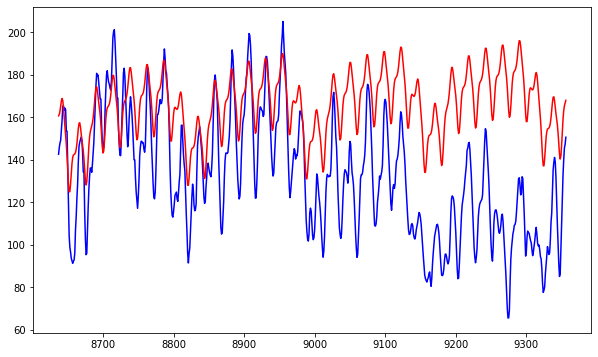

In [170]:
orig = plt.plot(test_data['y'], color='blue', label='Original')
predicted = plt.plot(df_new['yhat'], color='red', label='Predicted')
plt.show()